In [276]:
#Dependencies
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
import math
from pandas.api.types import CategoricalDtype
import holidays

#Drive Mount
drive.mount('/content/drive')
directory = '/content/drive/MyDrive/Data Projects/Parking Citations/Files'

#Dataframe Settings
pd.set_option("display.max_rows", None, "display.max_columns", None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data
______________________


In [277]:
#Importing Data
df = pd.read_csv(f'{directory}/Parking_Citations.csv', usecols= ['Fine amount', 'Issue Date', 'Issue time'])
# df = pd.read_csv(f'{directory}/Parking_Citations_Cleaned.csv')

In [278]:
#Drop Missing Values
df = df.dropna()

#Renaiming Columns
df = df.rename(columns = {'Fine amount':'Fine_Amount', 'Issue time':'Time', 'Issue Date':'Date'})

#Converting Date to datetime object
df['Date'] = pd.to_datetime(df.Date) 

#Seperating Year
df['Year'] = pd.DatetimeIndex(df['Date']).year
#Only including years (2015-2022)
df = df.loc[df['Year'] >= 2015]
df = df.loc[df['Year'] <= 2022]

#Month of the year
df['Month'] = pd.DatetimeIndex(df['Date']).month_name() 

#Month of the year index
df['Month_Index'] = pd.DatetimeIndex(df['Date']).month 

#Day of the month
df['Day'] = pd.DatetimeIndex(df['Date']).day 

#Day of the week
df['Weekday'] = df['Date'].dt.day_name() 

#Week of the year
df['Week'] = df['Date'].dt.isocalendar().week 

#Day of the year
df['Year_Day'] = df['Date'].dt.dayofyear

#Calculating Hours
def hour(x):
  return int(math.floor(x / 100.0))
df['Hour'] = df['Time'].apply(hour)

#Calculating Minutes
def minute(x):
  return int(x - (math.floor(x / 100.0) *100))
df['Minute'] = df['Time'].apply(minute)

#Weekends
df['Weekend'] = df['Weekday']
df['Weekend'] = df['Weekend'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'Weekday')
df['Weekend'] = df['Weekend'].replace(['Saturday', 'Sunday'], 'Weekend')

#Holidays
us_holidays = holidays.US()
def get_holiday(x):
    return x in us_holidays
df['Holiday'] = df['Date'].apply(get_holiday)
df['Holiday'] = df['Holiday'].replace(False, 'No Holiday')
df['Holiday'] = df['Holiday'].replace(True, 'Holiday')

#Dropping Fine Amount Outliers
df = df.loc[df['Fine_Amount'] <= 5000]

#Column Order
df = df[['Date', 'Year', 'Day', 'Month', 'Month_Index', 'Weekday', 'Weekend', 'Holiday', 'Week', 'Year_Day', 'Time', 'Hour', 'Minute', 'Fine_Amount']]

#DataFrame of individual dates since 2015-1-1
All_Days = pd.DataFrame(pd.date_range(start="2015-01-01",end=datetime.today()).to_pydatetime().tolist(), columns = ['Dates'])

#Analysis
_______________________

## Fine Amount

In [279]:
pd.crosstab(index=df['Fine_Amount'], columns='count')

col_0,count
Fine_Amount,
0.00,10650
5.00,1
10.00,169
25.00,1300012
30.00,12
35.00,291
40.00,300
45.00,70
47.85,1


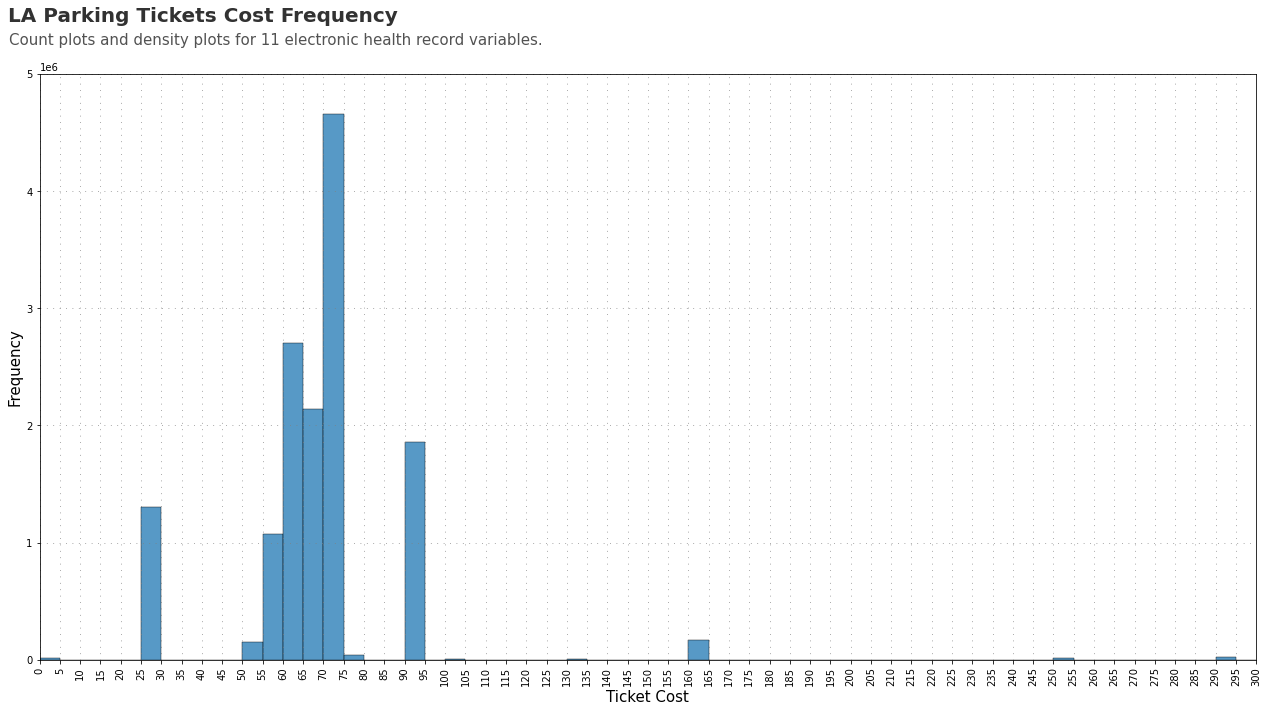

In [280]:
#Figure initialization
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)

#Figure annotations
plt.figtext(0.003, 1.059, 'LA Parking Tickets Cost Frequency', fontfamily='sans-serif',fontsize=20, fontweight='bold',color='#323232')
plt.figtext(0.004, 1.024, 'Count plots and density plots for 11 electronic health record variables.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot()
plt.title('', size = 14, fontname = 'sans-serif')
sns.histplot(data=df, x='Fine_Amount', binwidth=5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
ax1.set_ylabel('Frequency', size = 15, fontname = 'sans-serif')
ax1.set_xlabel('Ticket Cost', size = 15, fontname = 'sans-serif')
plt.xticks(np.arange(0, 351, step=5), rotation=90)
plt.xlim(0,300)
plt.ylim(0,5000000)

ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Data Overview.png' , bbox_inches="tight", dpi=600)

In [281]:
#Tickets per day

##Year

In [282]:
#Creating Crosstab and Frequency Tables
df_year = pd.crosstab(index=df['Year'], columns='count')
df_year = df_year.reset_index() 
df_year_avg = pd.DataFrame(df['Fine_Amount'].groupby(df['Year']).mean())
df_year_avg = df_year_avg.reset_index() 

In [283]:
#Get Counts of Days in each year
All_Days['Year'] = pd.DatetimeIndex(All_Days['Dates']).year
df_year['DayCounts'] = ''
for i in df_year.index:
  y = df_year['Year'][i]
  df_year['DayCounts'][i] = len(All_Days.loc[All_Days['Year'] == y])
df_year['Citations_Per_Day'] = df_year['count']/df_year['DayCounts']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [284]:
df_year.merge(df_year_avg, on='Year',how='left')

,Year,count,DayCounts,Citations_Per_Day,Fine_Amount
0,2015,2178162,365,5967.567123,69.952982
1,2016,2197403,366,6003.833333,69.890350
2,2017,2253034,365,6172.69589,70.310273
3,2018,1996726,365,5470.482192,70.317342
4,2019,1971702,365,5401.923288,71.312704
5,2020,1501974,366,4103.754098,74.485541
6,2021,1702302,365,4663.841096,73.344504
7,2022,452340,84,5385.0,71.372541


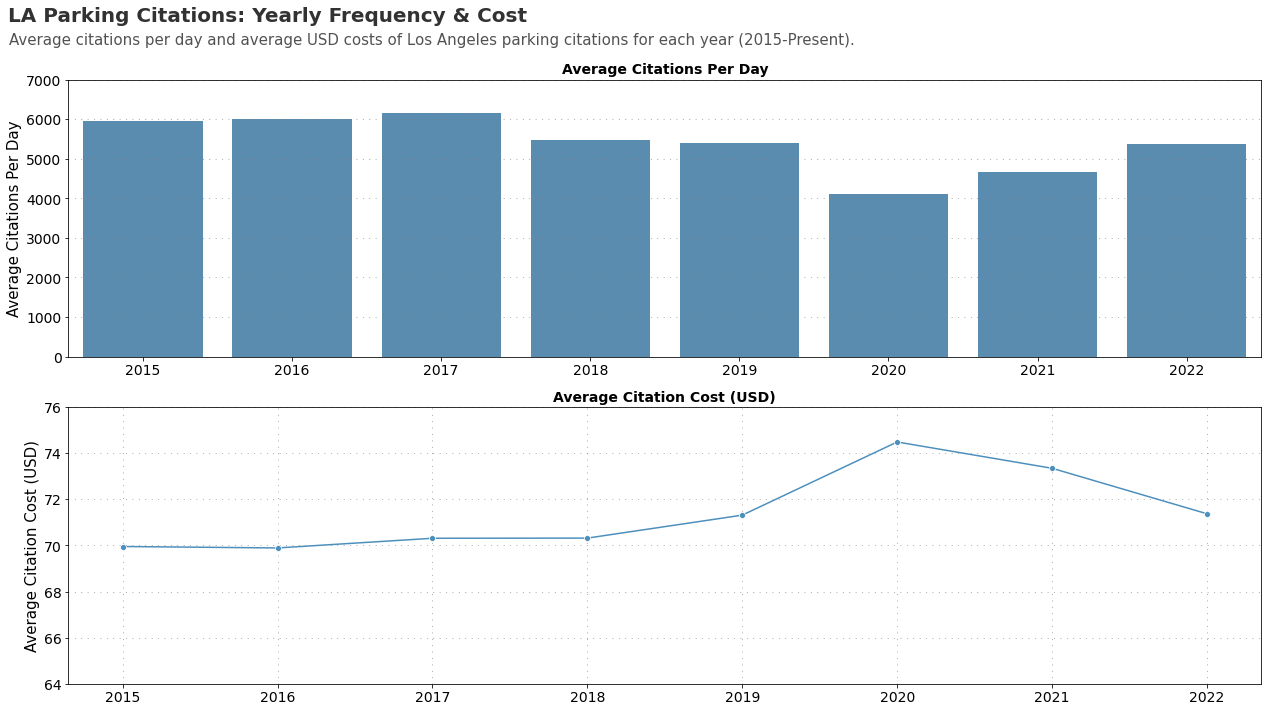

In [285]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Yearly Frequency & Cost', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per day and average USD costs of Los Angeles parking citations for each year (2015-Present).", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Day', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_year, x='Year', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Day', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,7000);

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_year_avg, x='Year', y='Fine_Amount', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citation Cost (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(64,76);

ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

## Month

In [286]:
#Creating Crosstab and Frequency Tables
df_month = pd.crosstab(index=df['Month'], columns='count')
df_month = df_month.reset_index() 
df_month_avg = pd.DataFrame(df['Fine_Amount'].groupby(df['Month']).mean())
df_month_avg = df_month_avg.reset_index() 

#Sorting By Month Order
x = CategoricalDtype(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_month['Month'] = df_month['Month'].astype(x)
df_month_avg['Month'] = df_month_avg['Month'].astype(x)
df_month.sort_values(by="Month", inplace =True)
df_month_avg.sort_values(by="Month", inplace =True)

In [287]:
#Get Counts of Days in each Month
All_Days['Month'] = pd.DatetimeIndex(All_Days['Dates']).month_name()
df_month['DayCounts'] = ''
for i in df_month.index:
  y = df_month['Month'][i]
  df_month['DayCounts'][i] = len(All_Days.loc[All_Days['Month'] == y])
df_month['Citations_Per_Day'] = df_month['count']/df_month['DayCounts']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [288]:
df_month.merge(df_month_avg, on='Month',how='left')

,Month,count,DayCounts,Citations_Per_Day,Fine_Amount
0,January,1418050,248,5717.943548,70.405441
1,February,1346124,226,5956.300885,70.517761
2,March,1358189,242,5612.35124,70.753763
3,April,1083209,210,5158.138095,70.976430
4,May,1115054,217,5138.497696,71.047949
5,June,1105455,210,5264.071429,71.228532
6,July,1067627,217,4919.940092,71.914985
7,August,1194578,217,5504.967742,71.503926
8,September,1080864,210,5146.971429,71.659681
9,October,1235801,217,5694.935484,71.730423


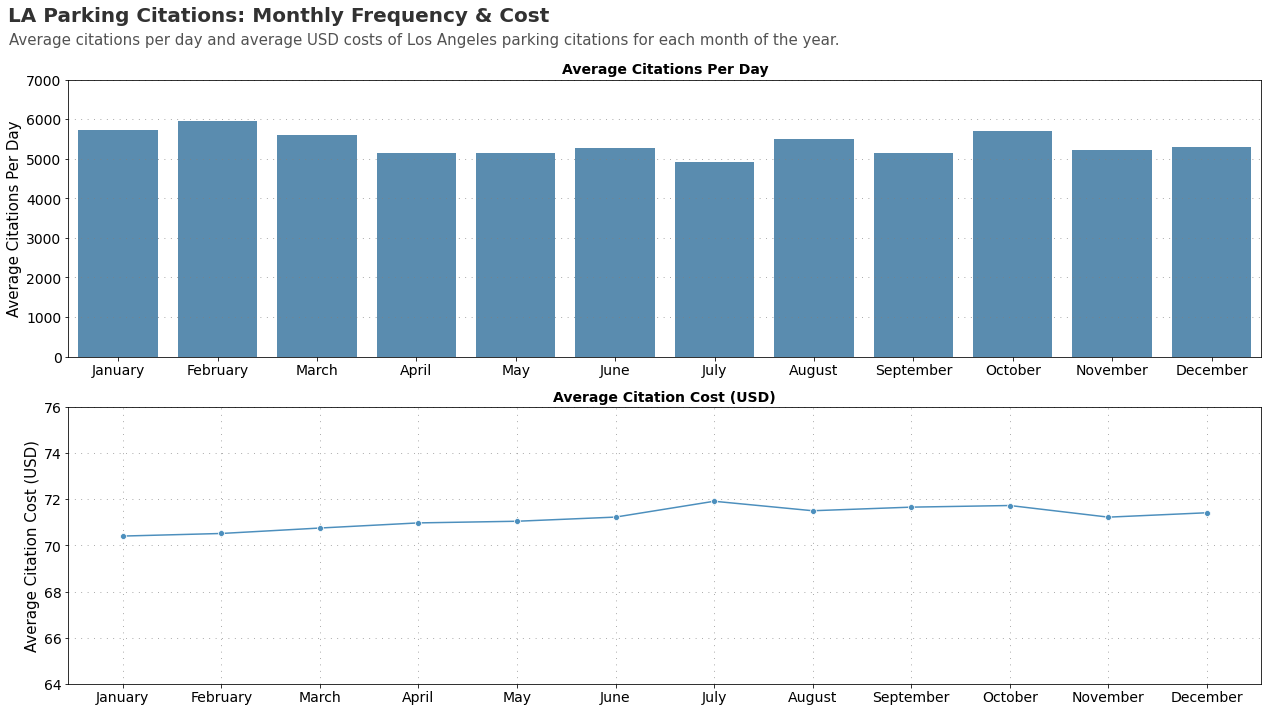

In [289]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Monthly Frequency & Cost', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per day and average USD costs of Los Angeles parking citations for each month of the year.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Day', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_month, x='Month', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Day', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,7000);

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_month_avg, x='Month', y='Fine_Amount', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citation Cost (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(64,76);


ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

## Day of the month

In [290]:
#Creating Crosstab and Frequency Tables
df_Day = pd.crosstab(index=df['Day'], columns='count')
df_Day = df_Day.reset_index() 
df_Day_avg = pd.DataFrame(df['Fine_Amount'].groupby(df['Day']).mean())
df_Day_avg = df_Day_avg.reset_index() 

In [291]:
#Get Counts of Day Numbers in each Month
All_Days['Day'] = pd.DatetimeIndex(All_Days['Dates']).day 
df_Day['DayCounts'] = ''
for i in df_Day.index:
  y = df_Day['Day'][i]
  df_Day['DayCounts'][i] = len(All_Days.loc[All_Days['Day'] == y])
df_Day['Citations_Per_Day'] = df_Day['count']/df_Day['DayCounts']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [292]:
df_Day.merge(df_Day_avg, on='Day',how='left')

,Day,count,DayCounts,Citations_Per_Day,Fine_Amount
0,1,440370,87,5061.724138,71.055552
1,2,477040,87,5483.218391,70.887471
2,3,479399,87,5510.333333,70.888868
3,4,465540,87,5351.034483,71.012504
4,5,475885,87,5469.942529,71.089959
5,6,475583,87,5466.471264,71.052250
6,7,478103,87,5495.436782,70.857110
7,8,489887,87,5630.885057,71.083174
8,9,487960,87,5608.735632,70.831639
9,10,476192,87,5473.471264,71.144410


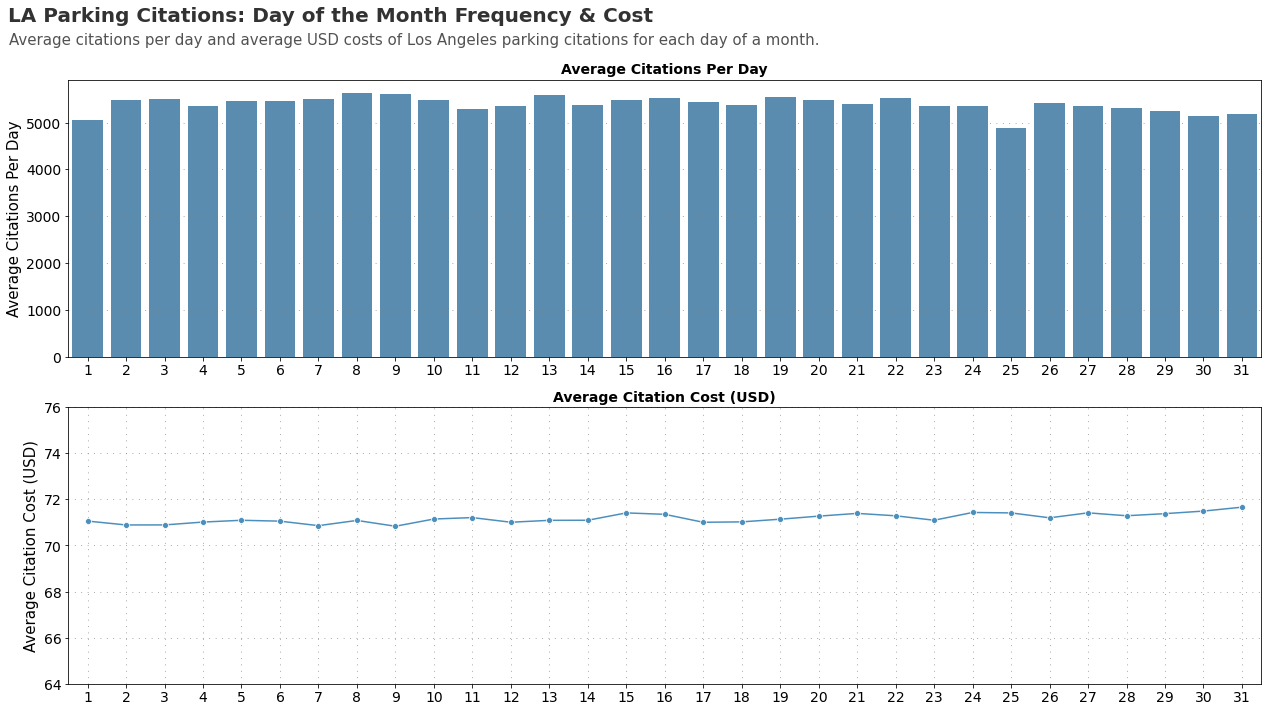

In [293]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Day of the Month Frequency & Cost', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per day and average USD costs of Los Angeles parking citations for each day of a month.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Day', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Day, x='Day', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Day', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
# plt.ylim(0,80);

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Day_avg, x='Day', y='Fine_Amount', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citation Cost (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(1, 32, step=1))
plt.ylim(64,76);
plt.xlim(0.5,31.5);

ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

##Day of the Week

In [294]:
#Creating Crosstab and Frequency Tables
df_Weekday = pd.crosstab(index=df['Weekday'], columns='count')
df_Weekday = df_Weekday.reset_index() 
df_Weekday_avg = pd.DataFrame(df['Fine_Amount'].groupby(df['Weekday']).mean())
df_Weekday_avg = df_Weekday_avg.reset_index() 

In [295]:
#Sorting By Month Order
x = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df_Weekday['Weekday'] = df_Weekday['Weekday'].astype(x)
df_Weekday_avg['Weekday'] = df_Weekday_avg['Weekday'].astype(x)
df_Weekday.sort_values(by="Weekday", inplace =True)
df_Weekday_avg.sort_values(by="Weekday", inplace =True)

In [299]:
All_Days.head()

,Dates,Year,Month,Day,Weekday
0,2015-01-01,2015,January,1,Thursday
1,2015-01-02,2015,January,2,Friday
2,2015-01-03,2015,January,3,Saturday
3,2015-01-04,2015,January,4,Sunday
4,2015-01-05,2015,January,5,Monday


In [298]:
#Get Counts of Day Numbers in each Month
All_Days['Weekday'] = All_Days['Dates'].dt.day_name()

df_Weekday['DayCounts'] = ''
for i in df_Weekday.index:
  y = df_Weekday['Weekday'][i]
  df_Weekday['DayCounts'][i] = len(All_Days.loc[All_Days['Weekday'] == y])
df_Weekday['Citations_Per_Day'] = df_Weekday['count']/df_Weekday['DayCounts']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [300]:
df_Weekday.merge(df_Weekday_avg, on='Weekday',how='left')

,Weekday,count,DayCounts,Citations_Per_Day,Fine_Amount
0,Monday,2300180,377,6101.27321,71.190135
1,Tuesday,2736976,377,7259.883289,70.901472
2,Wednesday,2584321,377,6854.962865,71.185209
3,Thursday,2663477,378,7046.23545,71.203709
4,Friday,2318723,378,6134.187831,71.334269
5,Saturday,941878,377,2498.350133,69.559399
6,Sunday,708088,377,1878.217507,73.497205


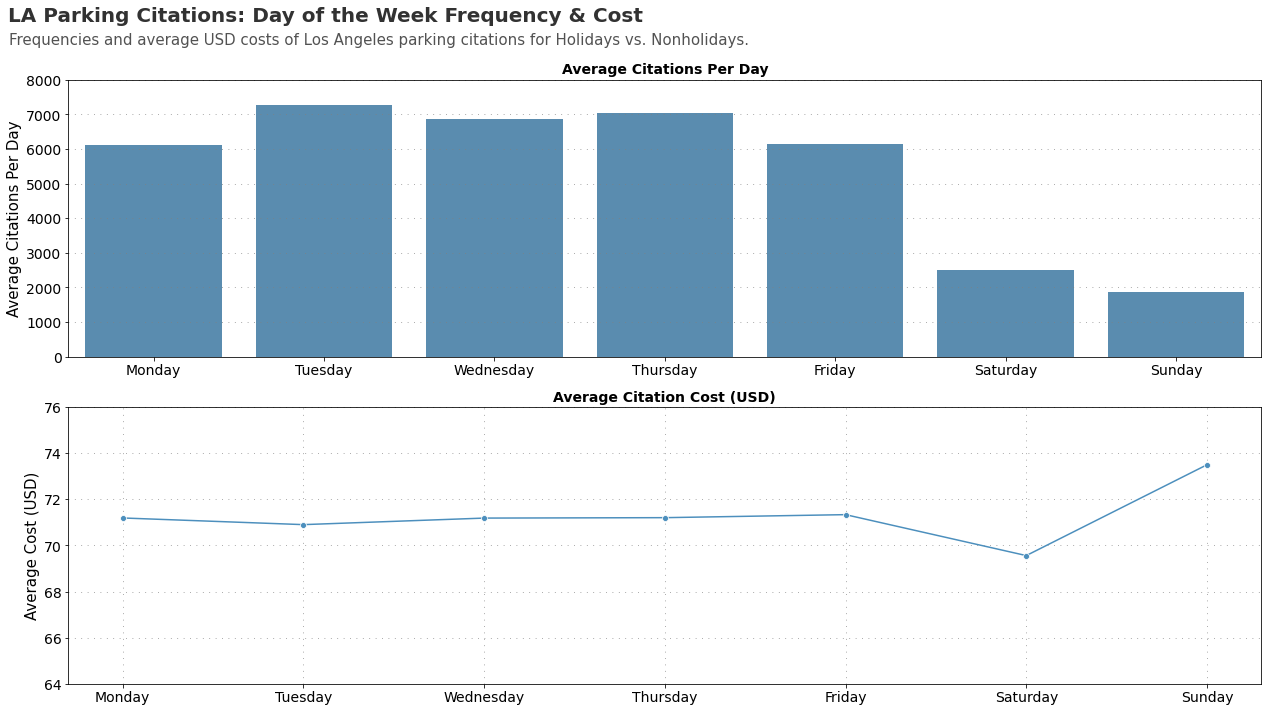

In [301]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Day of the Week Frequency & Cost', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Frequencies and average USD costs of Los Angeles parking citations for Holidays vs. Nonholidays.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

# plt.figtext(0.004, -0.03, 'NOTE: 2022 and 2014 data has been excluded due to incomplete data.', fontsize = 12, color = '#757575')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Day', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Weekday, x='Weekday', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Day', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,8000);

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Weekday_avg, x='Weekday', y='Fine_Amount', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Cost (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(64,76);


ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

## Holidays


In [302]:
#Creating Crosstab and Adjusted Frequency Tables
df_Holiday = pd.crosstab(index=df['Holiday'], columns='count')
df_Holiday = df_Holiday.reset_index() 
df_Holiday_avg = pd.DataFrame(df['Fine_Amount'].groupby(df['Holiday']).mean())
df_Holiday_avg = df_Holiday_avg.reset_index() 

In [303]:
#Get Counts of Holidays vs no holiday
us_holidays = holidays.US()
def get_holiday(x):
    return x in us_holidays
All_Days['Holiday'] = All_Days['Dates'].apply(get_holiday)
Holiday_Count = len(All_Days.loc[All_Days['Holiday'] == True])
No_Holiday_Count = len(All_Days.loc[All_Days['Holiday'] == False])
df_Holiday['DayCounts'] = [Holiday_Count,No_Holiday_Count]
df_Holiday['Citations_Per_Day'] = df_Holiday['count']/df_Holiday['DayCounts']

In [304]:
df_Holiday.merge(df_Holiday_avg, on='Holiday',how='left')

,Holiday,count,DayCounts,Citations_Per_Day,Fine_Amount
0,Holiday,89552,82,1092.097561,78.617998
1,No Holiday,14164091,2559,5535.010160,71.119537


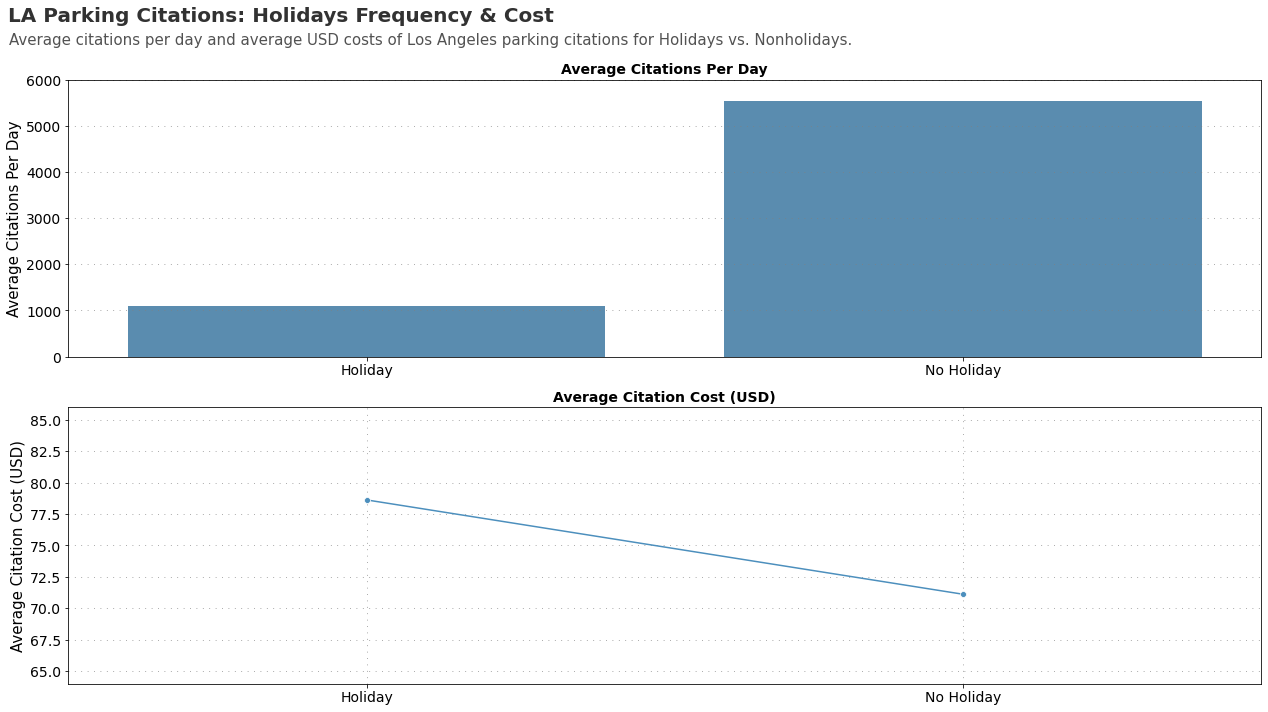

In [305]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.01, hspace=.01)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Holidays Frequency & Cost', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per day and average USD costs of Los Angeles parking citations for Holidays vs. Nonholidays.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Day', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Holiday, x='Holiday', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Day', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,6000);

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Holiday_avg, x='Holiday', y='Fine_Amount', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citation Cost (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(64,86);
plt.xlim(-0.5,1.5)

ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

## Weekend

In [306]:
#Creating Crosstab and Frequency Tables
df_Weekend = pd.crosstab(index=df['Weekend'], columns='count')
df_Weekend = df_Weekend.reset_index() 
df_Weekend_avg = pd.DataFrame(df['Fine_Amount'].groupby(df['Weekend']).mean())
df_Weekend_avg = df_Weekend_avg.reset_index() 

In [307]:
#Get Counts of Days that are weekends
All_Days['Weekday'] = All_Days['Dates'].dt.day_name() 
All_Days['Weekend'] = All_Days['Weekday']
All_Days['Weekend'] = All_Days['Weekend'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'Weekday')
All_Days['Weekend'] = All_Days['Weekend'].replace(['Saturday', 'Sunday'], 'Weekend')

Weekend_Count = len(All_Days.loc[All_Days['Weekend'] == 'Weekend'])
No_Weekend_Count = len(All_Days.loc[All_Days['Weekend'] == 'Weekday'])

df_Weekend['DayCounts'] = [Weekend_Count,No_Weekend_Count]
df_Weekend['Citations_Per_Day'] = df_Weekend['count']/df_Weekend['DayCounts']

df_Weekend = df_Weekend.sort_values(by='Citations_Per_Day')

In [308]:
df_Weekend.merge(df_Weekend_avg, on='Weekend',how='left')

,Weekend,count,DayCounts,Citations_Per_Day,Fine_Amount
0,Weekend,1649966,1887,874.385798,71.249321
1,Weekday,12603677,754,16715.751989,71.155825


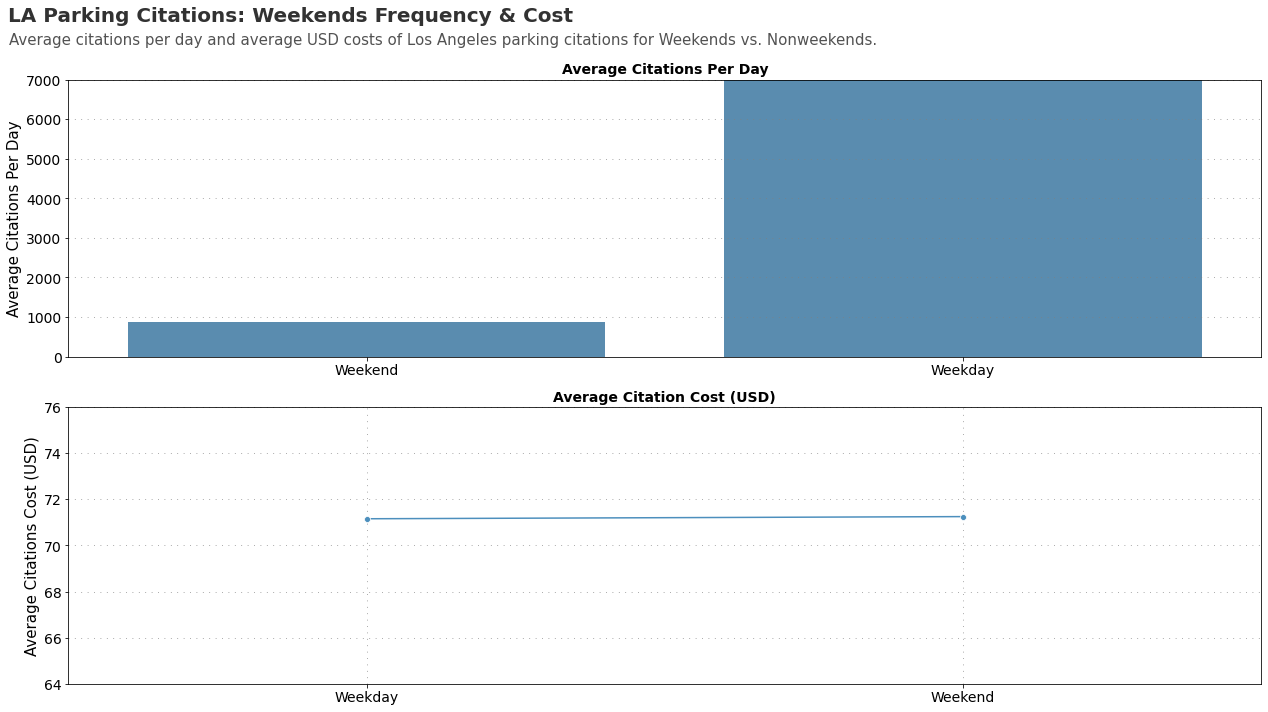

In [309]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Weekends Frequency & Cost', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per day and average USD costs of Los Angeles parking citations for Weekends vs. Nonweekends.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Day', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Weekend, x='Weekend', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Day', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,8000);


#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Weekend_avg, x='Weekend', y='Fine_Amount', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Cost (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(64,76);
plt.xlim(-0.5,1.5)

ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

## Week of the year

In [310]:
#Creating Crosstab and Frequency Tables
df_Week = pd.crosstab(index=df['Week'], columns='count')
df_Week = df_Week.reset_index() 
df_Week_avg = pd.DataFrame(df['Fine_Amount'].groupby(df['Week']).mean())
df_Week_avg = df_Week_avg.reset_index() 

In [ ]:
#Get Counts of days in weeks of the year
All_Days['Week'] = All_Days['Dates'].dt.isocalendar().week 

df_Week['DayCounts'] = ''
for i in df_Week.index:
  y = df_Week['Week'][i]
  df_Week['DayCounts'][i] = len(All_Days.loc[All_Days['Week'] == y])
df_Week['Citations_Per_Day'] = df_Week['count']/df_Week['DayCounts']

In [312]:
df_Week.merge(df_Week_avg, on='Week',how='left')

,Week,count,DayCounts,Citations_Per_Day,Fine_Amount
0,1,281797,53,5316.924528,71.088827
1,2,346766,56,6192.25,70.179858
2,3,306139,56,5466.767857,70.271673
3,4,334680,56,5976.428571,70.357461
4,5,357979,56,6392.482143,70.113116
5,6,346393,56,6185.589286,70.393957
6,7,319792,56,5710.571429,70.754984
7,8,308989,56,5517.660714,70.806207
8,9,347893,56,6212.375,70.477630
9,10,349866,56,6247.607143,70.516489


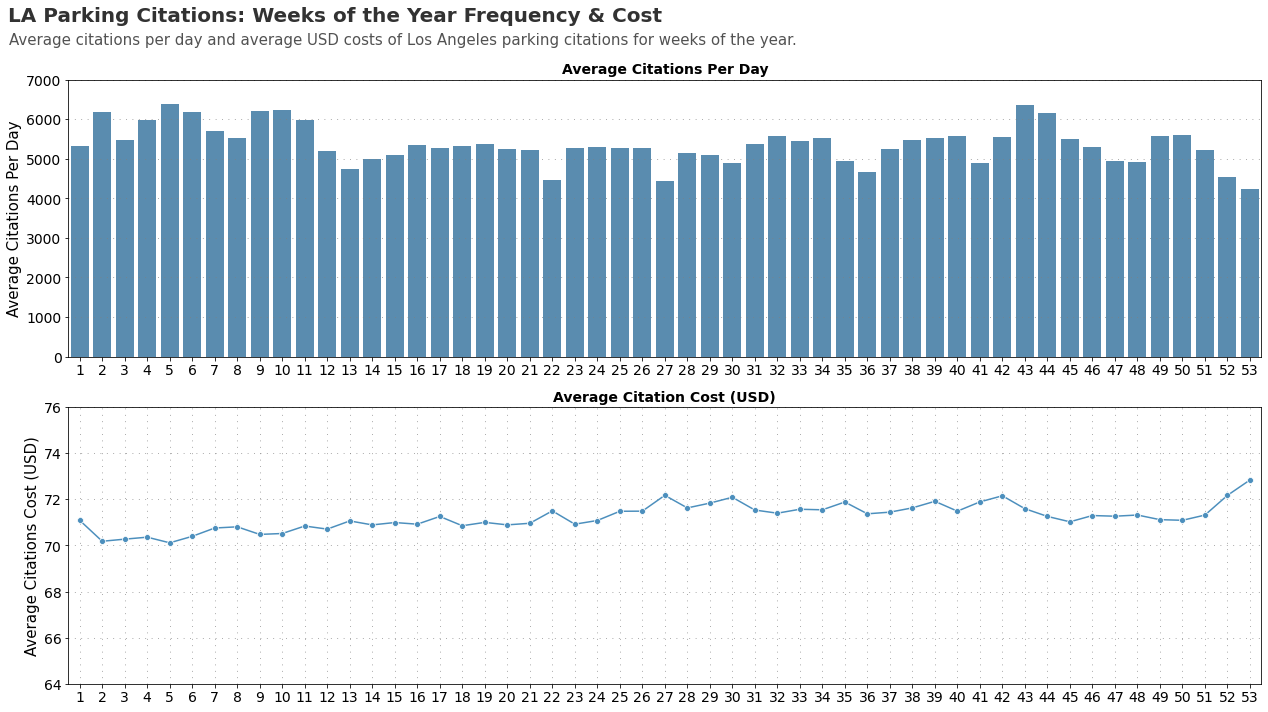

In [313]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Weeks of the Year Frequency & Cost', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per day and average USD costs of Los Angeles parking citations for weeks of the year.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Day', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Week, x='Week', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Day', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,7000);


#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Week_avg, x='Week', y='Fine_Amount', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Cost (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(1, 54, step=1))
plt.ylim(64,76);
plt.xlim(0.5,53.5);

ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

##Day of Year

In [314]:
#Creating Crosstab and Frequency Tables
df_Year_Day = pd.crosstab(index=df['Year_Day'], columns='count')
df_Year_Day = df_Year_Day.reset_index() 
df_Year_Day_avg = pd.DataFrame(df['Fine_Amount'].groupby(df['Year_Day']).mean())
df_Year_Day_avg = df_Year_Day_avg.reset_index() 

In [315]:
#Get Counts of days in days of the year
All_Days['Year_Day'] = All_Days['Dates'].dt.dayofyear

df_Year_Day['DayCounts'] = ''
for i in df_Year_Day.index:
  y = df_Year_Day['Year_Day'][i]
  df_Year_Day['DayCounts'][i] = len(All_Days.loc[All_Days['Year_Day'] == y])
df_Year_Day['Citations_Per_Day'] = df_Year_Day['count']/df_Year_Day['DayCounts']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [322]:
df_Year_Day.merge(df_Year_Day_avg, on='Year_Day',how='left')

,Year_Day,count,DayCounts,Citations_Per_Day,Fine_Amount
0,1,8582,8,1072.75,78.225122
1,2,41255,8,5156.875,70.704278
2,3,41277,8,5159.625,70.964782
3,4,49601,8,6200.125,70.300397
4,5,45286,8,5660.75,70.486508
5,6,51313,8,6414.125,70.413969
6,7,52151,8,6518.875,70.419398
7,8,53126,8,6640.75,70.048903
8,9,39980,8,4997.5,69.956003
9,10,43208,8,5401.0,71.022745


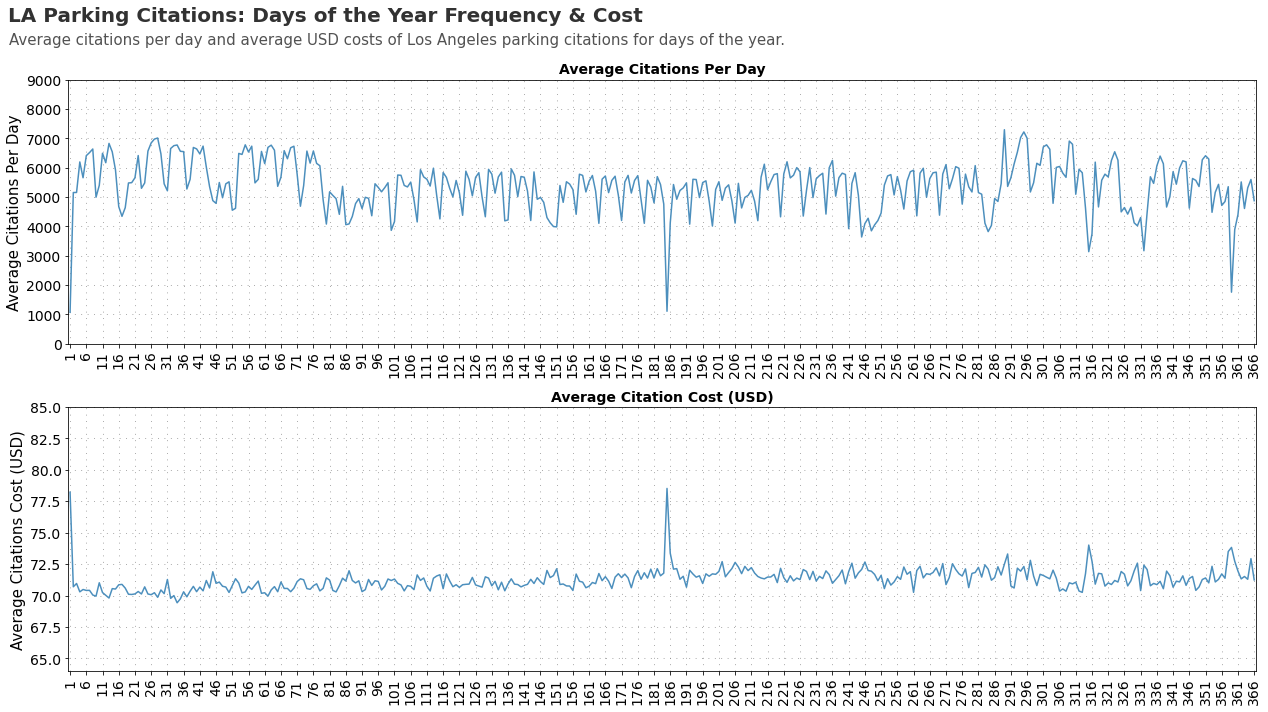

In [342]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Days of the Year Frequency & Cost', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per day and average USD costs of Los Angeles parking citations for days of the year.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Day', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Year_Day, x='Year_Day', y='Citations_Per_Day', ax=ax1, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Day', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif', rotation=90);
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(1, 367, step=5))
plt.xlim(0.5,366.5);
plt.ylim(0,9000);


#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Year_Day_avg, x='Year_Day', y='Fine_Amount', ax=ax2, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Cost (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif', rotation=90);
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(1, 367, step=5))
plt.ylim(64,85);
plt.xlim(0.5,366.5);

ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

## Hour

In [344]:
#Creating Crosstab and Frequency Tables
df_Hour = pd.crosstab(index=df['Hour'], columns='count')
df_Hour = df_Hour.reset_index() 
df_Hour_avg = pd.DataFrame(df['Fine_Amount'].groupby(df['Hour']).mean())
df_Hour_avg = df_Hour_avg.reset_index() 

In [351]:
sum(df_Hour['Citations_Per_Hour'])

5397.0628549791745

In [349]:
#Get Counts of days in days of the year
df_Hour['HourCounts'] = ''
for i in df_Hour.index:
  y = df_Hour['Hour'][i]
  df_Hour['HourCounts'][i] = len(All_Days)
df_Hour['Citations_Per_Hour'] = df_Hour['count']/df_Hour['HourCounts']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


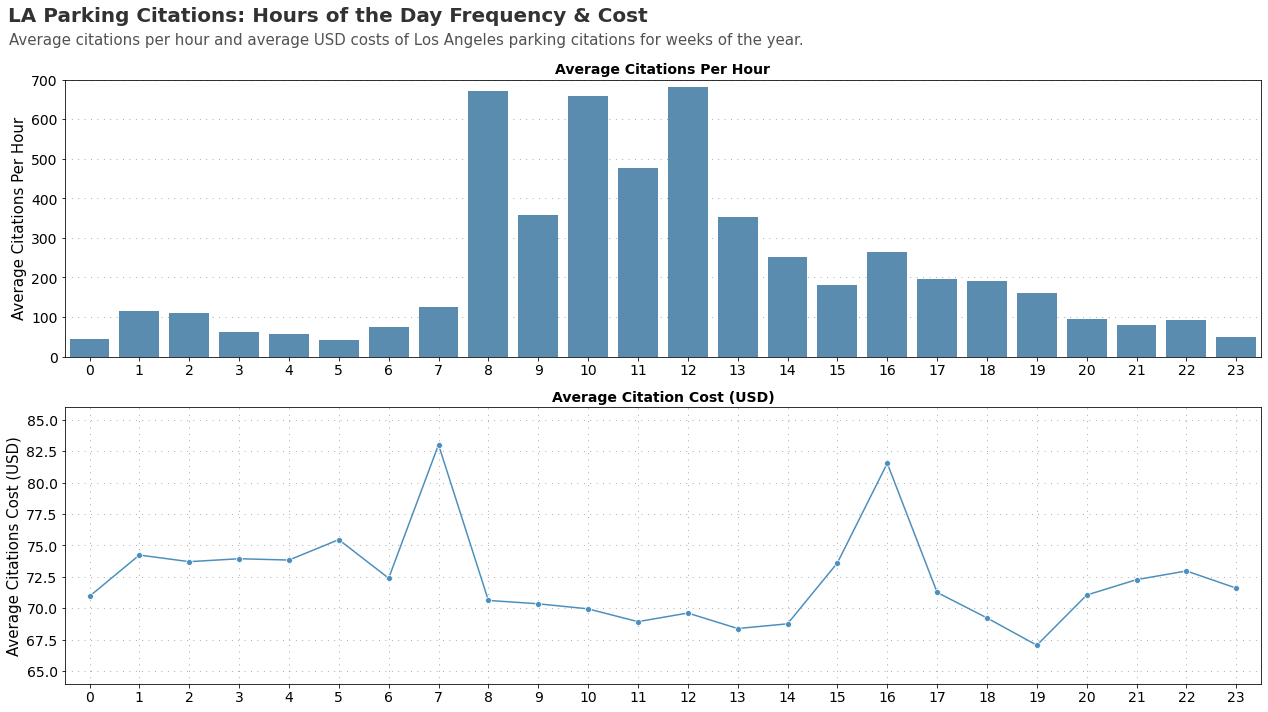

In [360]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Hours of the Day Frequency & Cost', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per hour and average USD costs of Los Angeles parking citations for weeks of the year.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Hour', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Hour, x='Hour', y='Citations_Per_Hour', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Hour', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,700);


#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Hour_avg, x='Hour', y='Fine_Amount', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Cost (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(0, 24, step=1))
plt.ylim(64,86);
plt.xlim(-0.5,23.5);

ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

## Minute

In [361]:
#Creating Crosstab and Frequency Tables
df_Minute = pd.crosstab(index=df['Minute'], columns='count')
df_Minute = df_Minute.reset_index() 
df_Minute_avg = pd.DataFrame(df['Fine_Amount'].groupby(df['Minute']).mean())
df_Minute_avg = df_Minute_avg.reset_index() 

In [364]:
#Get Counts of days in days of the year
df_Minute['MinuteCounts'] = ''
for i in df_Minute.index:
  y = df_Minute['Minute'][i]
  df_Minute['MinuteCounts'][i] = len(All_Days) * 24
df_Minute['Citations_Per_Minute'] = df_Minute['count']/df_Minute['MinuteCounts']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


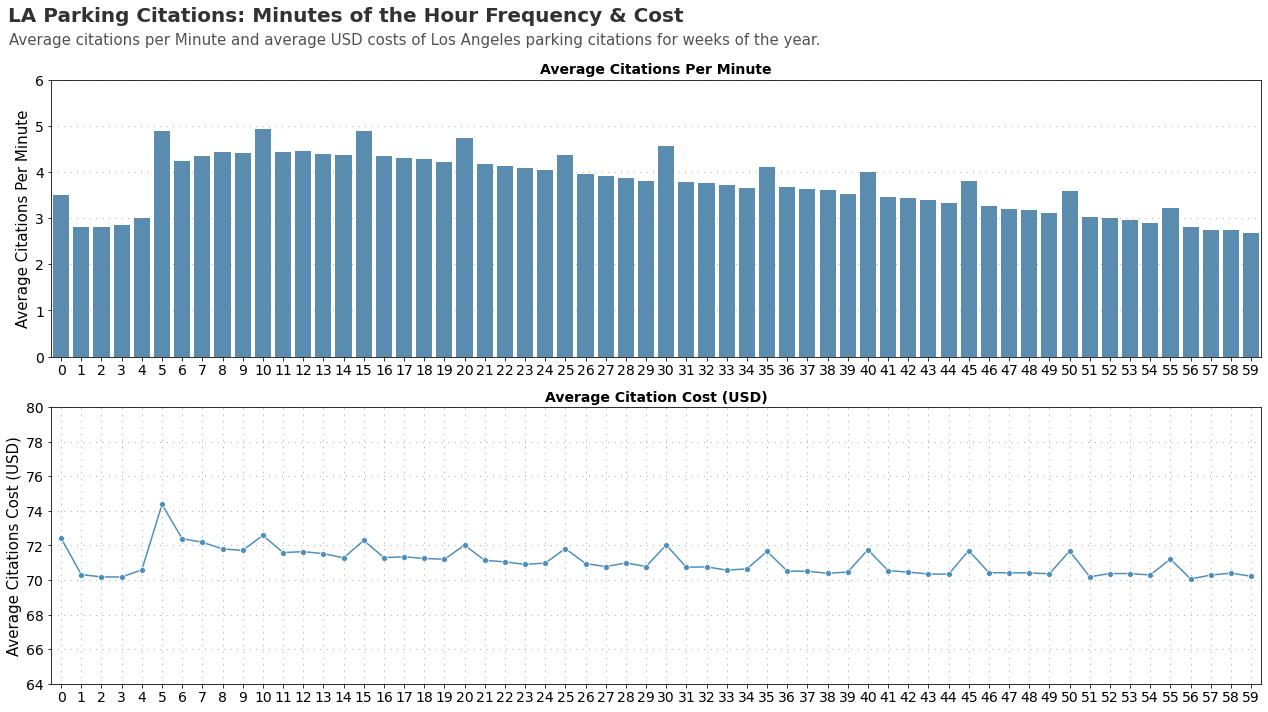

In [372]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Minutes of the Hour Frequency & Cost', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per Minute and average USD costs of Los Angeles parking citations for weeks of the year.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Minute', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Minute, x='Minute', y='Citations_Per_Minute', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Minute', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,6);


#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Minute_avg, x='Minute', y='Fine_Amount', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Cost (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(0, 60, step=1))
plt.ylim(64,80);
plt.xlim(-0.5,59.5);

ax.patch.set_facecolor('white')
# ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

##Season

# Prediction Model
_______________________